In [36]:
import os
import time

current_folder = os.path.basename(os.getcwd())
if current_folder == 'notebooks':
    root_path = os.path.dirname(os.path.abspath(''))
    os.chdir(root_path)

from src.analyst import Analyst
from src.plotter import Plotter
from src.llm import LLM

from collections import defaultdict

import pickle
from pprint import pprint

from IPython import get_ipython
# Automatically reload all modules every time a line of code is executed
get_ipython().run_line_magic('load_ext', 'autoreload')
get_ipython().run_line_magic('autoreload', '2')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Initialize our helper classes

In [7]:
analyst = Analyst()
analyst.load_data()
analyst.build_respondents_list()

plotter = Plotter()
llm = LLM()

# Fetch the relevant dataset to analyze

In [178]:

question = dict()
question['tag'] = 'census_skills'
question['question'] = "In your opinion, what are the top three skills most in demand in the battery industry?"
question['data'] = analyst.summarize_census_skills_demand()['skills_in_demand']


question = dict()
question['tag'] = 'company_role_title'
question['question'] = "What is your current job title?"
question['data'] = analyst.summarize_company_role()['role_title_list']

question = dict()
question['tag'] = 'company_role_prev'
question['question'] = "What was your previous role before joining the battery industry?"
question['data'] = analyst.summarize_company_role()['role_prev_role_list']

question = dict()
question['tag'] = 'company_skills_positions_hardest_to_fill'
question['question'] = "In your opinion, which positions are the hardest to fill in your company?"
question['data'] = analyst.summarize_company_skills()['hardest_to_fill_positions_list']

question = dict()
question['tag'] = 'company_skills_barriers_to_talent'
question['question'] = "In your opinion, what do you think are the main barriers to hiring skilled talent in the battery industry?"
question['data'] = analyst.summarize_company_skills()['barriers_to_talent_list']

question = dict()
question['tag'] = 'company_skills_top_for_success'
question['question'] = "In your opinion, what are the top skills that contributed to your success?"
question['data'] = analyst.summarize_company_skills()['top_skills_for_success_list']

question = dict()
question['tag'] = 'company_retention_next_role_looking_for'
question['question'] = "Is there anything else you'd like to share about what you're looking for in your next role?"
question['data'] = analyst.summarize_company_retention()['retention_misc_list']

question = dict()
question['tag'] = 'company_benefits_unique'
question['question'] = 'Are there any unique benefits that you value?'
question['data'] = analyst.summarize_company_benefits()['unique_benefits_list']

question = dict()
question['tag'] = 'student_ideal_title'
question['question'] = 'After you graduate, what would be your ideal job titel?'
question['data'] = analyst.summarize_student_ideal()['ideal_job_title_list']

question = dict()
question['tag']= 'student_internship_skills_top'
question['question'] = 'During your previous internship, what are the top three skills that contributed to your success?'
question['data'] = analyst.summarize_student_internship()['internship_top_skills_list']

question = dict()
question['tag']= 'student_internship_skills_wish_learned'
question['question'] = "During your previous internship, were there skills you wish you had learned but didn't? If yes, what were they?"
question['data'] = analyst.summarize_student_internship()['internship_skills_wish_learned_list']

question = dict()
question['tag'] = 'student_internship_skills_unprepared'
question['question'] = "During your previous internship, were there skills that you felt unprepared for? If yes, what were they?"
question['data'] = analyst.summarize_student_internship()['internship_skills_unprepared_list']


# Pre-process the user response

Interpret the delimiters

In [58]:
keyword_list = []

for i, string_of_list in enumerate(question['data']):

    print(f"Processing response {i+1} of {len(question['data'])}")

    list_of_strings = llm.delimit_string_of_list(string_of_list)

    print(f'--> {list_of_strings}\n')

    keyword_list.extend(list_of_strings)

Processing response 1 of 933
Processing response 2 of 933
Processing response 3 of 933
Processing response 4 of 933
Processing response 5 of 933
Processing response 6 of 933
Processing response 7 of 933
Processing response 8 of 933
Processing response 9 of 933
Processing response 10 of 933
Processing response 11 of 933
Processing response 12 of 933
Processing response 13 of 933
Processing response 14 of 933
Processing response 15 of 933
Processing response 16 of 933
Processing response 17 of 933
Processing response 18 of 933
Processing response 19 of 933
Processing response 20 of 933
Processing response 21 of 933
Processing response 22 of 933
Processing response 23 of 933
Processing response 24 of 933
Processing response 25 of 933
Processing response 26 of 933
Processing response 27 of 933
Processing response 28 of 933
Processing response 29 of 933
Processing response 30 of 933
Processing response 31 of 933
Processing response 32 of 933
Processing response 33 of 933
Processing response

In [78]:
# Assemble and cache the list
print(keyword_list)
timestamp = time.strftime('%Y%m%d_%H%M%S')
with open(f'data/strlist_{question['tag']}_{timestamp}.pkl', 'wb') as f:
    pickle.dump(keyword_list, f)

['Scale up', 'ability to keep up with and foresee research/industry trends and directions', 'language abilities (Chinese, Korean, Japanese)', 'Design for Reliability', 'Test', 'Agile', 'Innovative', 'Communication', 'design', 'manufacturing', 'testing', 'Electrochemistry', 'Process', 'Data Analysis', 'Scientific Observation', 'Data Analysis', 'ability to contribute to a team', 'Data analysis', 'research and experimentation', 'presentation skills', 'data science', 'manufacturing', 'pouch cells', 'Technical Knowledge', 'Software', 'Entrepreneurship', 'BMS', 'Safety', 'process engineer', 'cell knowledge', 'Electrical knowledge', 'organisational skills', 'poise', 'Manufacturing scale-up', 'Knowledge', 'Research', 'Analytical Power', 'MATLAB optimisation 1', 'COMSOL 2', 'Cell Engineering (R&D and Mature Products)', 'Product Pricing/Cost Engineering', 'Strategic Partnership', 'software/programming', 'battery chemistry design', 'testing', 'Material Synthesis', 'Material Characterization', 'Da

# Define categories

In [197]:
categories = llm.define_categories(question['question'], keyword_list,
                                   num_categories=20)

category_list = []

for category in categories['categories']:
    category_list.append(category['name'])

pprint(category_list)

['Battery Chemistry / Electrochemistry',
 'Materials Science and Characterization',
 'Battery Design',
 'Battery Manufacturing / Scale-up / Process Engineering',
 'Battery Testing / Failure Analysis / Quality Control',
 'Battery Management Systems (BMS)',
 'Data Science / Data Analysis / AI / Machine Learning',
 'Modeling / Simulation / Computational Tools',
 'Electrical Engineering / Power Electronics',
 'Thermal Management',
 'Programming / Software Development',
 'Project Management / Leadership / Teamwork',
 'Communication / Presentation Skills / Language Skills',
 'Business Skills / Marketing / Strategy / Market Knowledge',
 'Supply Chain / Logistics / Procurement',
 'Innovation / Creativity / Problem Solving',
 'Safety / Standards / Regulations / Compliance',
 'Soft Skills (e.g., flexibility, adaptability, resilience)',
 'Environmental Knowledge / Sustainability / Recycling',
 'Interdisciplinary / Cross-functional Collaboration']


# Assign categories

Process one keyword at a time!

In [184]:
content_list = []
other_list = []
fail_list = []

for i, keyword in enumerate(keyword_list):

    print(f"Processing response: '{keyword}' ({i+1} of {len(keyword_list)})...")

    try:
        output = llm.classify_user_response(category_list, keyword)
    except:
        fail_list.append(keyword)
        continue

    if output['result']['category'] in category_list:
        content_list.append(output)
    else:
        other_list.append(output)

Processing response: 'Scale up' (1 of 2561)...
Processing response: 'ability to keep up with and foresee research/industry trends and directions' (2 of 2561)...
Processing response: 'language abilities (Chinese, Korean, Japanese)' (3 of 2561)...
Processing response: 'Design for Reliability' (4 of 2561)...
Processing response: 'Test' (5 of 2561)...
Processing response: 'Agile' (6 of 2561)...
Processing response: 'Innovative' (7 of 2561)...
Processing response: 'Communication' (8 of 2561)...
Processing response: 'design' (9 of 2561)...
Processing response: 'manufacturing' (10 of 2561)...
Processing response: 'testing' (11 of 2561)...
Processing response: 'Electrochemistry' (12 of 2561)...
Processing response: 'Process' (13 of 2561)...
Processing response: 'Data Analysis' (14 of 2561)...
Processing response: 'Scientific Observation' (15 of 2561)...
Processing response: 'Data Analysis' (16 of 2561)...
Processing response: 'ability to contribute to a team' (17 of 2561)...
Processing respons

In [191]:
len(other_list)

553

In [190]:
other_list

[{'result': {'response_text': 'language abilities (Chinese, Korean, Japanese)',
   'category': 'Other'}},
 {'result': {'response_text': 'Process', 'category': 'Other'}},
 {'result': {'response_text': 'Scientific Observation', 'category': 'Other'}},
 {'result': {'response_text': 'Technical Knowledge', 'category': 'Other'}},
 {'result': {'response_text': 'Electrical knowledge', 'category': 'Other'}},
 {'result': {'response_text': 'poise', 'category': 'Other'}},
 {'result': {'response_text': 'Knowledge', 'category': 'Other'}},
 {'result': {'response_text': 'Research', 'category': 'Other'}},
 {'result': {'response_text': 'adaptability', 'category': 'Other'}},
 {'result': {'response_text': 'perserverance', 'category': 'Other'}},
 {'result': {'response_text': 'Technical background', 'category': 'Other'}},
 {'result': {'response_text': 'eye for detail', 'category': 'Other'}},
 {'result': {'response_text': 'abstraction', 'category': 'Other'}},
 {'result': {'response_text': 'engineering', 'cate

In [192]:
fail_list[0]

IndexError: list index out of range

In [193]:

collection = defaultdict(list)
counter    = defaultdict(int)
for content in content_list:
    category = content['result']['category']
    response = content['result']['response_text']
    counter[category] += 1
    collection[category].append(response)

counter

defaultdict(int,
            {'Manufacturing and Process Engineering': 324,
             'Business and Market Knowledge': 168,
             'Testing and Validation': 126,
             'Project Management and Planning': 65,
             'Innovation and Problem Solving': 182,
             'Communication and Presentation Skills': 102,
             'Battery Systems Design and Integration': 179,
             'Electrochemistry and Battery Chemistry': 155,
             'Data Analysis and Data Science': 163,
             'Leadership and Teamwork': 98,
             'Programming, Software Development, AI and Machine Learning': 91,
             'Safety, Regulations, and Compliance': 68,
             'Material Science and Characterization': 155,
             'Battery Modeling and Simulation': 90,
             'Supply Chain and Logistics': 42})

In [140]:
collection

defaultdict(list,
            {'Manufacturing and Process Engineering': ['Scale up',
              'manufacturing',
              'Process',
              'manufacturing',
              'process engineer',
              'Manufacturing scale-up',
              'Manufacturing Basics',
              'electrode fabrication experience',
              'Process Engineering',
              'Equipment Engineering',
              'scale up for production',
              'Cell manufacturing',
              'Manufacturing Experience',
              'cell fabrication',
              'cell manufacturing process ramp-up',
              'Strong manufacturing knowledge',
              'Manufacturing',
              'Manufacturing and automation engineering',
              'pack-level assembly',
              'Manufacturing',
              'Gigafactory manufacturing experience',
              'Packaging',
              'Process scale-up',
              'Battery manufacturing',
              'Manufacturi

# Visualize the results

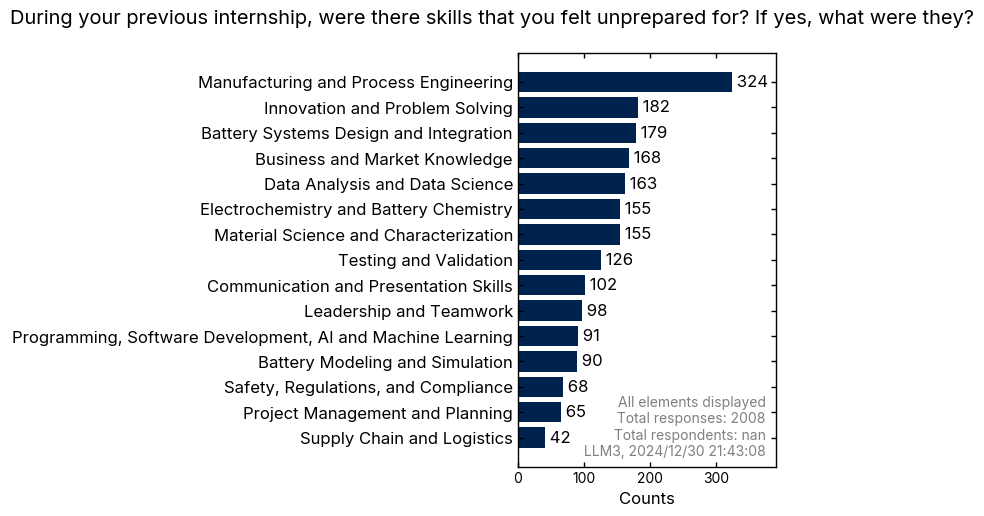

In [194]:
plotter.make_bar_plot_from_dict(counter,
                                title=question['question'],
                                sorted=True,
                                annotation=f'LLM3, {time.strftime("%Y/%m/%d %H:%M:%S")}',
                                num_elements=100,
                                saveas=f'{question['tag']}_{time.strftime("%Y%m%d_%H%M%S")}.png'
)